<a href="https://colab.research.google.com/github/ayushya19/jeremyhowardfastai/blob/master/dittoclasifierusingnondittoclasses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs=64

In [3]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False, verbose=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [0]:
folder='dittos'
files='url_dittos.csv'
foldern='notdittos'
filen='url_notdittos.csv'

#path = Path('data/bears')
#dest = path/folder

path=Path('data/images')
dest=path/folder
destn=path/foldern



dest.mkdir(parents=True ,exist_ok=True)
destn.mkdir(parents=True , exist_ok=True)

In [18]:
path.ls()

[PosixPath('data/images/dittos'), PosixPath('data/images/notdittos')]

In [47]:
classes=['dittos','notdittos']
print(path)

data/images


In [43]:
download_images("/contenzt/data/images/dittos/download",dest,max_pics=200)

In [45]:
download_images("/content/data/images/notdittos/randomdownload",destn,max_pics=200)

In [0]:
np.random.seed(42)

In [0]:
data=ImageDataBunch.from_folder(path,train=".",valid_pct=0.2,ds_tfms=get_transforms(),size=224,num_workers=4).normalize(imagenet_stats)

In [49]:
data.classes

['dittos', 'notdittos']

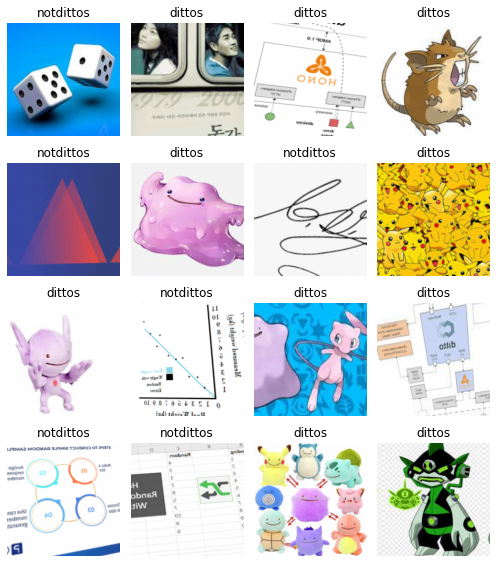

In [50]:
data.show_batch(rows=4,figsize=(7,8))

In [57]:

data.classes,data.c,len(data.train_ds),len(data.valid_ds)


LabelList (80 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
notdittos,notdittos,dittos,notdittos,dittos
Path: data/images


(['dittos', 'notdittos'], 2, 320, 80)

In [58]:
learner=cnn_learner(data,models.resnet34,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [61]:
learner.fit_one_cycle(4)

In [0]:
learner.save("first")

In [0]:
learner.unfreeze()

In [67]:
learner.lr_find(start_lr=1e-5,end_lr=1e-1)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


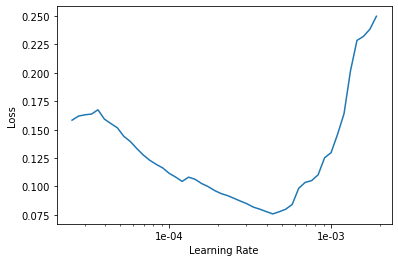

In [68]:
learner.recorder.plot()

In [69]:
learner.fit_one_cycle(2,max_lr=slice(2e-4,8e-4))

In [0]:
learner.save("stage-2")

In [71]:
learner.load("stage-2")

Learner(data=ImageDataBunch;

Train: LabelList (320 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
dittos,dittos,dittos,dittos,dittos
Path: data/images;

Valid: LabelList (80 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
notdittos,notdittos,dittos,notdittos,dittos
Path: data/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affin

In [72]:
interp=ClassificationInterpretation.from_learner(learner)

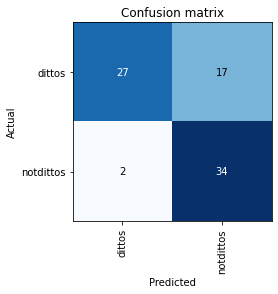

In [74]:
interp.plot_confusion_matrix()

78 misclassified samples over 80 samples in the validation set.


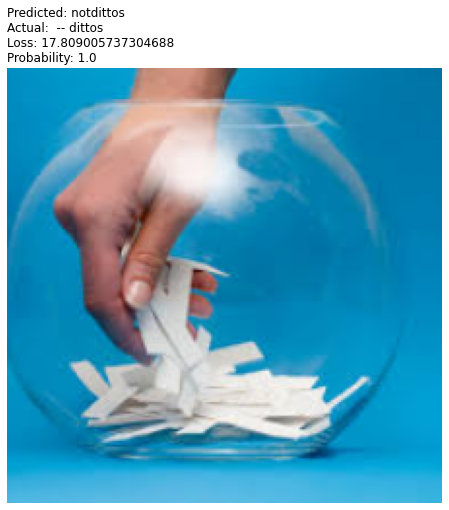

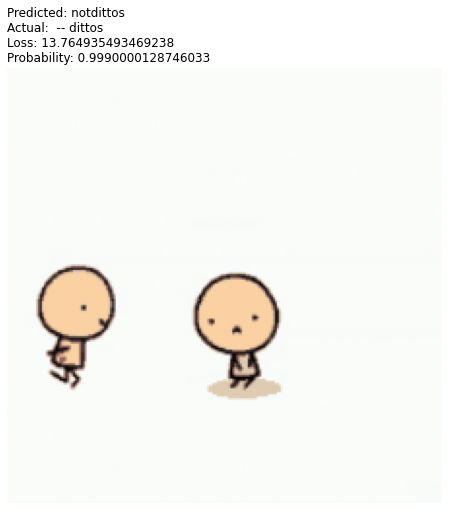

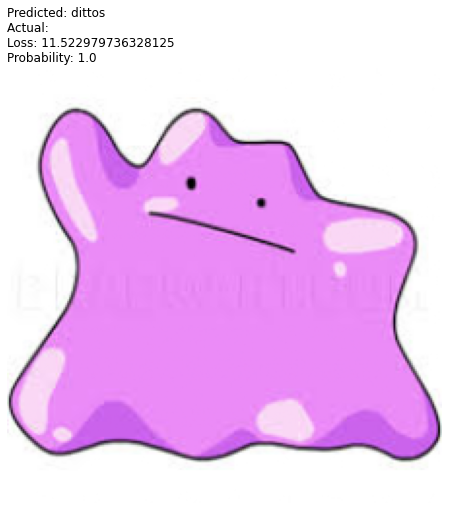

In [75]:
interp.plot_multi_top_losses()

In [0]:
from fastai.widgets import *

In [0]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [0]:
learn_cln=cnn_learner(db,models.resnet34,metrics=error_rate)

In [80]:
learn_cln.load("stage-2")

Learner(data=ImageDataBunch;

Train: LabelList (400 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
dittos,dittos,dittos,dittos,dittos
Path: data/images;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: data/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding

In [81]:
ds,idxs=DatasetFormatter().from_toplosses(learn_cln)

In [84]:
ImageCleaner(ds,idxs,path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [0]:
learner.export()

In [0]:
img=open_image("/content/8489156586d9ed46a18b573cddf3663a.jpg")

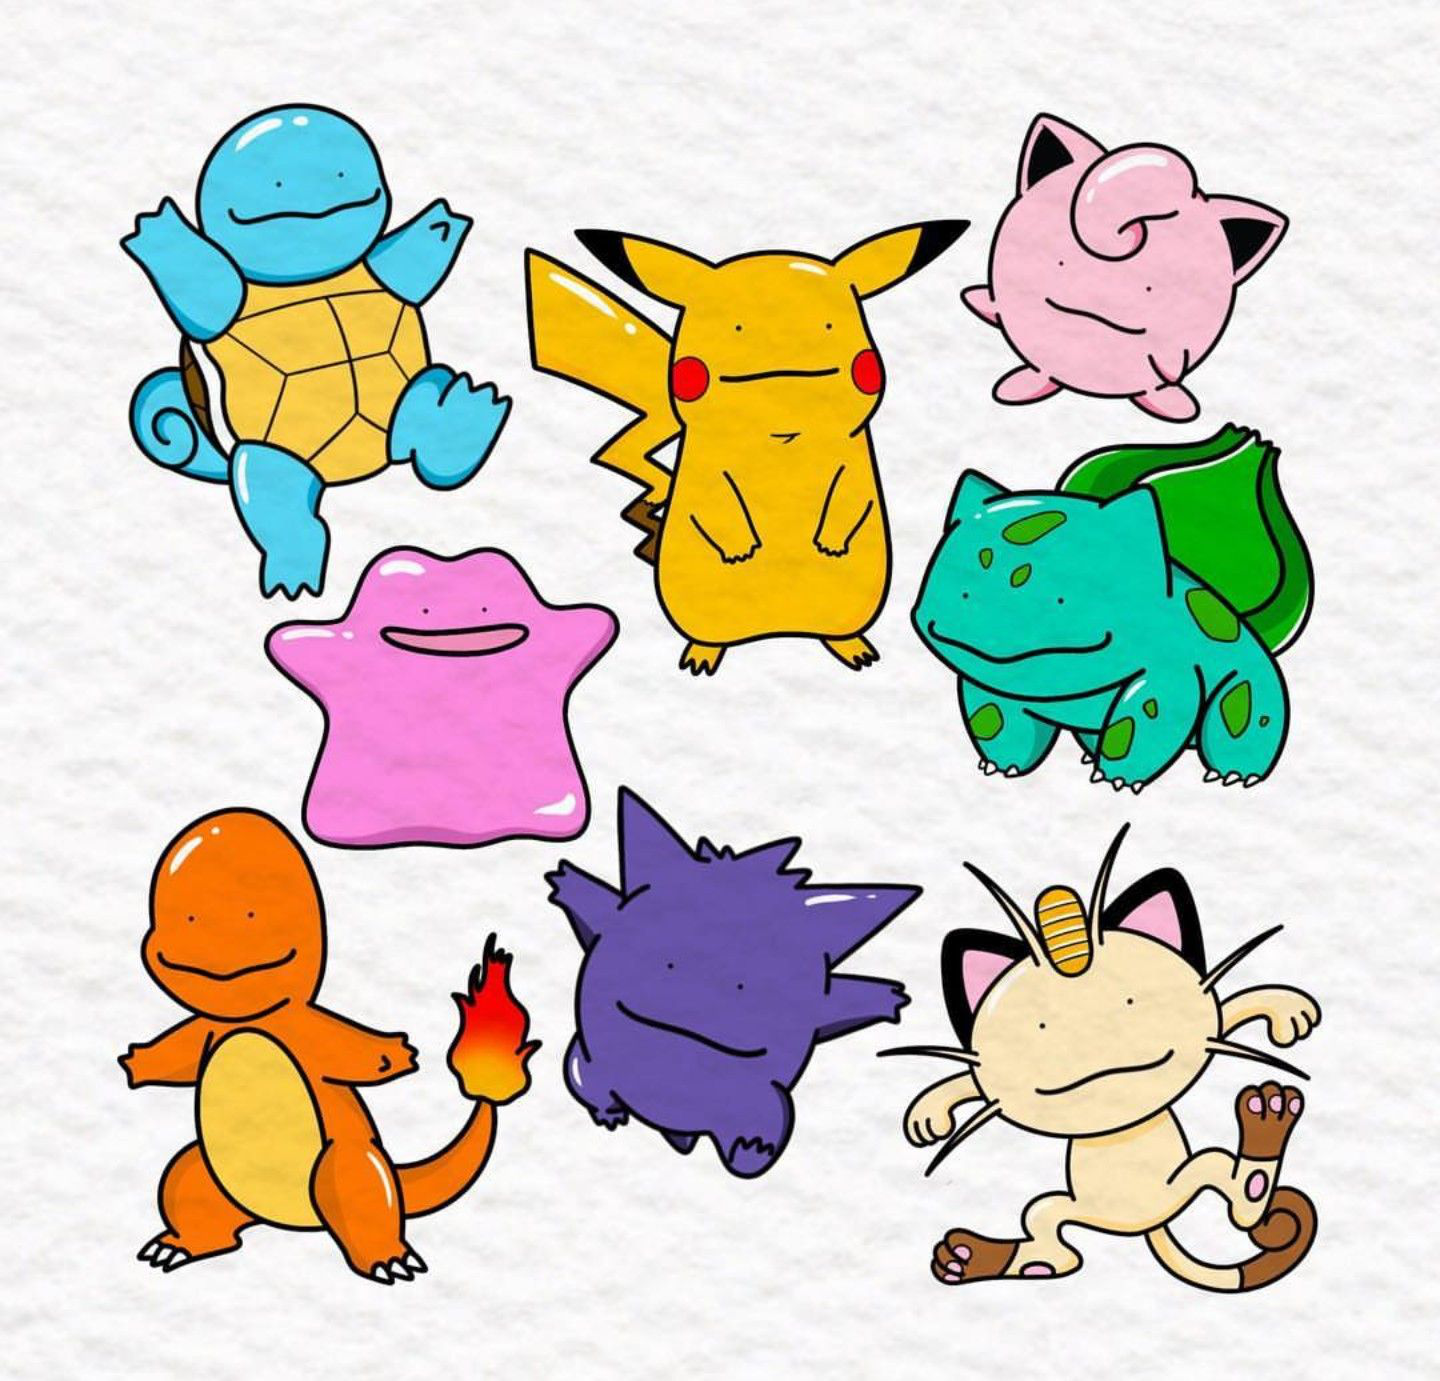

In [89]:
img


In [0]:
learn=load_learner(path)

In [91]:
pred_class,pred_idxs,ouputs=learner.predict(img)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


In [93]:
print(pred_class)

notdittos


In [0]:
img2=open_image('/content/132.png')

In [0]:
learn=load_learner(path)

In [97]:
pred_class2,pred_idxs2,outputs=learner.predict(img2)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


In [98]:
print(pred_class2)

dittos
